In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from PhyPraKit import readPicoScope, resample
from scipy import signal
from scipy import interpolate
import sys
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler                            
from uncertainties import ufloat, unumpy
from math import log10, floor
import scipy.integrate as integrate
import pandas as pd
import csv

In [2]:
### Aufgabe 1

In [3]:
U_W=(6.15+6.103)/2
U_Sp=(4.378+4.354)/2
Fasen_verschie=2.83*10**(-3)
R= 10
w=2*np.pi*50
f=50

In [4]:
L=U_W/U_Sp*R/w*np.sin(Fasen_verschie*2*np.pi*f)
r=U_W/U_Sp*R*np.cos(Fasen_verschie*2*np.pi*f)
print('bei 303,3mA L:',L)
print('bei 303,3mA r:',r)

bei 303,3mA L: 0.03468268810226373
bei 303,3mA r: 8.842224374294924


In [5]:
U_W=((631.5+631.5)/2)*10**(-3)
U_Sp=((448.4+444.8)/2)*10**(-3)
Fasen_verschie=2.83*10**(-3)
R= 10
w=2*np.pi*50
f=50

In [6]:
L=U_W/U_Sp*R/w*np.sin(Fasen_verschie*2*np.pi*f)
r=U_W/U_Sp*R*np.cos(Fasen_verschie*2*np.pi*f)
print('bei 31mA L:',L)
print('bei 31mA r:',r)

bei 31mA L: 0.03494931596294642
bei 31mA r: 8.91020017137395


In [7]:
#Aufgabe 3

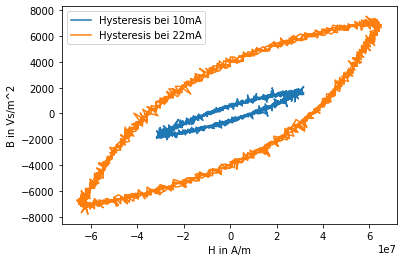

In [8]:
data=pd.read_csv('Werte/Aufgabe3_1_10mA.csv',delimiter=';',decimal=",",skiprows=1) #importiere Daten
data.columns=['f','U_R', 'U_RC']
U_R10mA = data['U_R'].to_numpy() *1000
U_RC10mA = data['U_RC'].to_numpy() * 1000
data=pd.read_csv('Werte/Aufgabe3_1_22mA/Aufgabe3_1_22mA_01.csv',delimiter=';',decimal=",",skiprows=1) #importiere Daten
data.columns=['f','U_R', 'U_RC']
U_R22mA = data['U_R'].to_numpy() * 1000
U_RC22mA = data['U_RC'].to_numpy() *1000
U_R10mA = U_R10mA * 208.33
U_RC10mA = U_RC10mA * 0.055
plt.plot(U_R10mA,U_RC10mA,label = 'Hysteresis bei 10mA')

U_R22mA = U_R22mA * 208.33
U_RC22mA = U_RC22mA * 0.055
plt.plot(U_R22mA,U_RC22mA,label= 'Hysteresis bei 22mA')
plt.xlabel('H in A/m')
plt.ylabel('B in Vs/m^2')
plt.legend()
plt.savefig('Aufgabe3Hysteresenkorr.png')
plt.show()

In [19]:
reader = csv.reader(open("Werte/Aufgabe3_1_10mA.csv", "r"), delimiter=';')
writer = csv.writer(open("output.csv", 'w'), delimiter=',')
writer.writerows(reader)